In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
texture_1 = plt.imread('../data/texture1.jpg').astype(np.float32)
h, w, c = texture_1.shape
block_size = 100
overlap_size = int(block_size / 6)
assert block_size < min(h, w)
y_max, x_max = h - block_size, w - block_size
dh = h * 2
dw = w * 2
nx_blocks = ny_blocks = max(dh, dw) // block_size
w_new = h_new = nx_blocks * block_size - (nx_blocks - 1) * overlap_size
n_blocks = nx_blocks * ny_blocks
xs = np.arange(x_max)
ys = np.arange(y_max)
all_blocks = [texture_1[y:y + block_size, x:x + block_size] for x in xs for y in ys]

In [3]:
# normalize_img normalizes our output to be between 0 and 1
def normalize_img(im):
    img = im.copy()
    img += np.abs(np.min(img))
    img /= np.max(img)
    return img

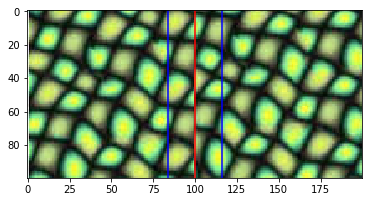

In [4]:
left_patch = all_blocks[0]
right_patch = all_blocks[1743]
combined_hor = np.hstack((left_patch, right_patch))
plt.imshow(normalize_img(np.hstack((left_patch, right_patch))))
plt.axvline(x=block_size, color='r')
plt.axvline(x=block_size - overlap_size, color='b')
plt.axvline(x=block_size + overlap_size, color='b')

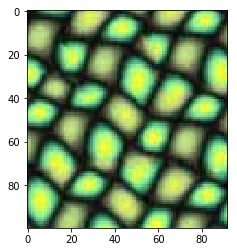

In [5]:
right_subpatch = right_patch[:, overlap_size//2:]
plt.imshow(normalize_img(right_subpatch))

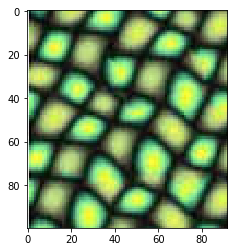

In [6]:
left_subpatch = left_patch[:, :block_size - overlap_size//2]
plt.imshow(normalize_img(left_subpatch))

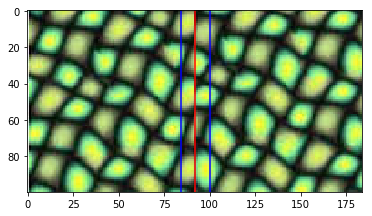

In [7]:
combined_subpatch_hor = np.hstack((left_subpatch, right_subpatch))
plt.imshow(normalize_img(combined_subpatch_hor))
plt.axvline(x=block_size, color='b')
plt.axvline(x=block_size - overlap_size//2, color='r')
plt.axvline(x=block_size - overlap_size, color='b')
plt.show()

In [8]:
h_padding = w_padding = block_size
target_height = h_new + 2 * h_padding
target_width = w_new + 2 * w_padding
target = np.zeros((target_height, target_width, c), dtype=texture_1.dtype)

# for now just focus on first row:
target = target[block_size:block_size*2, :, :]
target.shape

(100, 552, 3)

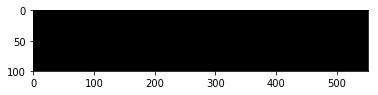

In [9]:
plt.imshow(target)

200


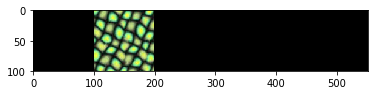

In [10]:
# first place random patch in top left
rand_patch = all_blocks[np.random.randint(len(all_blocks))]
x_end = w_padding + block_size
target[:, x_end - block_size:x_end] = rand_patch
plt.imshow(normalize_img(target))
print(x_end)

192 ---> 284


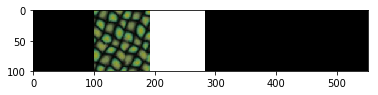

In [11]:
# now place second patch
# for now just select random patch
second_patch = np.ones_like(all_blocks[np.random.randint(len(all_blocks))])*400
x_end += block_size - overlap_size
target[:, x_end - block_size + overlap_size//2:x_end] = second_patch[:, overlap_size//2:]
plt.imshow(normalize_img(target))
print(x_end - block_size + overlap_size//2,"--->",x_end)

In [12]:
x_end

284

276 ---> 368


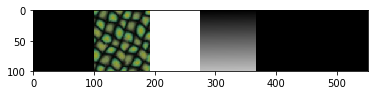

In [13]:
# third_patch = np.ones_like(all_blocks[np.random.randint(len(all_blocks))]) * 90
third_patch = np.arange(100*100*3).reshape(100,100,3)/100
x_end += block_size - overlap_size
target[:, x_end - block_size + overlap_size//2:x_end] = third_patch[:, overlap_size//2:]
plt.imshow(normalize_img(target))
print(x_end - block_size + overlap_size//2,"--->",x_end)

In [14]:
all_blocks[0].shape

(100, 100, 3)

In [15]:
# now put this in a for loop:
h_padding = w_padding = block_size
target_height = h_new + 2 * h_padding
target_width = w_new + 2 * w_padding
target = np.zeros((target_height, target_width, c), dtype=texture_1.dtype)

# for now just focus on first row:
target = target[block_size:block_size*2, :, :]

# place top left patch randomly
x_end = w_padding + block_size
rand_idx = np.random.randint(len(all_blocks))
print(rand_idx)
rand_patch = all_blocks[rand_idx]
target[:, x_end - block_size:x_end] = rand_patch
for x in range(4):
    if x == 0:
        continue
        
#     rand_patch = all_blocks[np.random.randint(len(all_blocks))]
    
    patch_left = target[:, x_end - 2*block_size:x_end - block_size]
    block_left = patch_left[:, -overlap_size:]
    left_sqdfs = np.sum((all_left_blocks - block_left) ** 2, axis=-1)
    left_cost  = np.sqrt(np.sum(left_sqdfs, axis=(1,2)))
    total_cost = np.zeros_like(left_cost)
    x_offset = 0
    if x > 0:
        x_offset += overlap_size//2
        total_cost += left_cost
    
    min_block = all_blocks[np.argmin(total_cost)]
    print(np.argmin(total_cost))
    x_end += block_size - overlap_size
    target[:, x_end - block_size + overlap_size//2:x_end] = min_block[:, overlap_size//2:]
plt.imshow(normalize_img(target))

15226


NameError: name 'all_left_blocks' is not defined

In [ ]:
# now try vertical
h_padding = w_padding = block_size
target_height = h_new + 2 * h_padding
target_width = w_new + 2 * w_padding
target = np.zeros((target_height, target_width, c), dtype=texture_1.dtype)

# for now just focus on first column:
target = target[:, block_size:block_size*2, :]

# place top left patch randomly
y_end = h_padding + block_size
rand_patch = all_blocks[np.random.randint(len(all_blocks))]
target[y_end - block_size:y_end, :] = rand_patch
for y in range(4):
    if y == 0:
        continue
    rand_patch = all_blocks[np.random.randint(len(all_blocks))]
    y_end += block_size - overlap_size
    target[y_end - block_size + overlap_size//2:y_end, :] = rand_patch[overlap_size//2:, :]
plt.imshow(normalize_img(target))

In [ ]:
# now try full
h_padding = w_padding = block_size
target_height = h_new + 2 * h_padding
target_width = w_new + 2 * w_padding
target = np.zeros((target_height, target_width, c), dtype=texture_1.dtype)

y_end = h_padding + block_size
step = block_size - overlap_size
for y in range(nx_blocks):
    x_end = w_padding + block_size
    
    for x in range(ny_blocks):
        
        if x == 0 and y == 0:
            # place top left patch randomly
            rand_patch = all_blocks[np.random.randint(len(all_blocks))]
            target[y_end - block_size:y_end, x_end - block_size:x_end] = rand_patch
            x_end += step
            continue
        
        # place patch
        rand_patch = all_blocks[np.random.randint(len(all_blocks))]
        # for visualization
        rand_patch[:, :, np.random.randint(3)] *= 1.2
        rand_patch[:, :, np.random.randint(3)] *= 2.3
        rand_patch[:, :, np.random.randint(3)] *= 1.6
        
        x_offset = y_offset = 0
        if x > 0:
            x_offset += overlap_size//2
        if y > 0:
            y_offset += overlap_size//2
            
        target[y_end - block_size + y_offset:y_end, 
               x_end - block_size + x_offset:x_end] = rand_patch[y_offset:, x_offset:]

        x_end += step
    y_end += step
    
plt.imshow(normalize_img(target))

In [ ]:
#### Now compute cost function for top and left blocks
all_blocks = np.array(all_blocks)
all_blocks.shape

In [ ]:
all_top_blocks = all_blocks[:, :overlap_size]
all_left_blocks = all_blocks[:, :, :overlap_size]

In [ ]:
# x_end = w_padding
# y_end = h_padding
x_end -= block_size
y_end -= block_size

In [ ]:
# get the bottom of the above block
patch_to_fill = target[y_end - block_size:y_end, x_end - block_size:x_end]
plt.imshow(normalize_img(patch_to_fill))

In [ ]:
patch_above = target[y_end - 2*block_size:y_end - block_size, x_end - block_size:x_end]
plt.imshow(normalize_img(patch_above))

In [ ]:
block_above = patch_above[-overlap_size:, :]
plt.imshow(normalize_img(block_above))
block_above.shape

In [ ]:
# then get the rightside of the block to the left of the current patch
patch_left = target[y_end - block_size:y_end, x_end - 2*block_size:x_end - block_size]
plt.imshow(normalize_img(patch_left))

In [ ]:
block_left = patch_left[:, -overlap_size:]
plt.imshow(normalize_img(block_left))
block_left.shape

In [ ]:
## now compute the costs (L2 Dist.)
top_sqdfs = np.sum((all_top_blocks - block_above) ** 2, axis=-1)
left_sqdfs = np.sum((all_left_blocks - block_left) ** 2, axis=-1)

top_cost = np.sum(np.sqrt(top_sqdfs), axis=(1,2))
left_cost = np.sum(np.sqrt(left_sqdfs), axis=(1,2))
top_cost.shape, left_cost.shape

In [ ]:
# now try full
h_padding = w_padding = block_size
target_height = h_new + 2 * h_padding
target_width = w_new + 2 * w_padding
target = np.zeros((target_height, target_width, c), dtype=texture_1.dtype)

all_top_blocks = all_blocks[:, :overlap_size]
all_left_blocks = all_blocks[:, :, :overlap_size]

y_end = h_padding + block_size
step = block_size - overlap_size
for y in range(nx_blocks):
    x_end = w_padding + block_size
    
    for x in range(ny_blocks):
        
        if x == 0 and y == 0:
            # place top left patch randomly
            rand_patch = all_blocks[np.random.randint(len(all_blocks))]
            target[y_end - block_size:y_end, x_end - block_size:x_end] = rand_patch
            x_end += step
            continue
        
        # place patch       
        patch_above = target[y_end - 2*block_size:y_end - block_size, x_end - block_size:x_end]
        block_above = patch_above[-overlap_size:, :]
        patch_left = target[y_end - block_size:y_end, x_end - 2*block_size:x_end - block_size]
        block_left = patch_left[:, -overlap_size:]

        ## now compute the costs (L2 Dist.)
        top_sqdfs = np.sum((all_top_blocks - block_above) ** 2, axis=-1)
        left_sqdfs = np.sum((all_left_blocks - block_left) ** 2, axis=-1)

        top_cost   = np.sqrt(np.sum(top_sqdfs, axis=(1,2)))
        left_cost  = np.sqrt(np.sum(left_sqdfs, axis=(1,2)))
        total_cost = np.zeros_like(top_cost)
        
        x_offset = y_offset = 0
        if x > 0:
            x_offset += overlap_size//2
            total_cost += left_cost
        if y > 0:
            y_offset += overlap_size//2
            total_cost += top_cost
            
        min_block = all_blocks[np.argmin(total_cost)]
        
        target[y_end - block_size + y_offset:y_end, 
               x_end - block_size + x_offset:x_end] = min_block[y_offset:, x_offset:]

        x_end += step
    y_end += step
    
plt.imshow(normalize_img(target))

In [ ]:
plt.imshow(normalize_img(target[h_padding:480, w_padding:])), y_end, x_end